# M8a: Autoregressive models

In [22]:
# Basic system and data packages
import numpy as np
import pandas as pd
from collections import OrderedDict
import itertools
import statsmodels.formula.api as smf
import sys
import time
import requests
# Plotting packages
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from io import BytesIO

## Autoregressive model example for monthly average temperature data

In [23]:
df = pd.read_csv('../../../data/mobile-forecast/emissions-populations-dvmt.csv')
#Plot the data set
df

,Unnamed: 0,Year,Mobile GHG Emissions (MMTCO2e),Agriculture GHG Emissions (MMTCO2e),Commercial GHG Emissions (MMTCO2e),Electricity GHG Emissions (MMTCO2e),Industrial GHG Emissions (MMTCO2e),Residential GHG Emissions (MMTCO2e),Solidwaste GHG Emissions (MMTCO2e),Wastewater GHG Emissions (MMTCO2e),Population,DVMT (Miles)
0,0,1990,15.120625,0.375261,3.828568,11.908703,3.001041,8.279021,1.065912,0.359842,3289056,72072000
1,1,1991,15.005884,0.348502,3.662331,12.015808,3.100758,8.024783,1.113482,0.361827,3288640,72948000
2,2,1992,15.086747,0.389088,4.312955,11.282676,3.355918,9.505435,1.242805,0.362378,3274997,72293000
3,3,1993,15.146864,0.415000,3.843474,10.228667,3.447719,9.081525,1.209374,0.363307,3272325,74025000
4,4,1994,15.066461,0.408122,4.172272,10.395885,3.150548,8.677775,1.237386,0.365658,3268346,74352000
5,5,1995,14.815692,0.400748,3.841800,10.320433,3.103303,7.977389,1.249919,0.365747,3265293,76830000
6,6,1996,15.623592,0.344938,4.133427,10.734700,3.257568,8.461561,1.268976,0.367926,3267030,76874000
7,7,1997,15.679850,0.348057,4.301810,13.201970,3.266450,8.186120,1.615209,0.368520,3268514,78202000
8,8,1998,15.917011,0.375380,4.036593,12.948870,3.119599,7.122707,1.526577,0.371087,3272563,79936000
9,9,1999,17.112669,0.374800,4.290578,12.210134,3.236276,8.041005,1.455471,0.375030,3282031,81630000


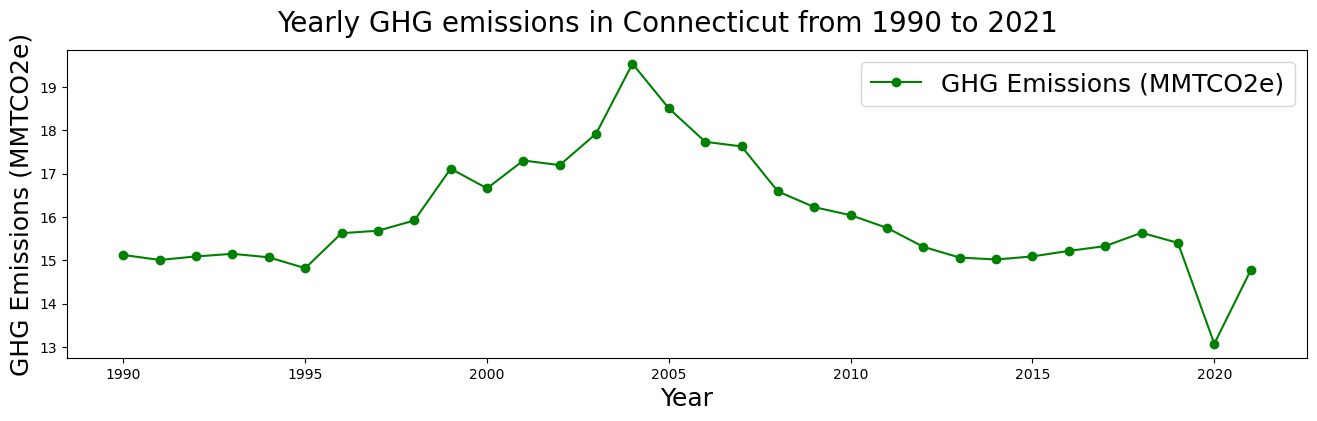

In [24]:
fig = plt.figure(figsize=(16,4))
fig.suptitle('Yearly GHG emissions in Connecticut from 1990 to 2021',fontsize=20)
actual, = plt.plot(df['Year'], df['Mobile GHG Emissions (MMTCO2e)'], 'go-', label='GHG Emissions (MMTCO2e)')
plt.xlabel('Year',fontsize=18)
plt.ylabel('GHG Emissions (MMTCO2e)',fontsize=18)
plt.legend(handles=[actual],fontsize=18)
#plt.savefig('images/avetemp.png',bbox_inches='tight')
plt.show()

In [25]:
#set the date as the index value
# Set 'Column_A' as the row index and add 'Column_B' as a new column
new_df = df.set_index('Year')[['Mobile GHG Emissions (MMTCO2e)']].copy()
#assigning the training and test set
split_index = round(len(new_df)*0.8)
df_train = new_df.iloc[:split_index].copy()
df_test = new_df.iloc[split_index:].copy()
df_test

,Mobile GHG Emissions (MMTCO2e)
Year,
2016,15.214360
2017,15.325243
2018,15.633220
2019,15.399656
2020,13.071437
2021,14.766522


In [26]:
mod = AutoReg(df_train, lags=8, old_names=False)

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
res = mod.fit()

In [28]:
print(res.summary())

                                  AutoReg Model Results                                   
Dep. Variable:     Mobile GHG Emissions (MMTCO2e)   No. Observations:                   26
Model:                                 AutoReg(8)   Log Likelihood                 -10.582
Method:                           Conditional MLE   S.D. of innovations              0.436
Date:                            Tue, 16 Jan 2024   AIC                             41.164
Time:                                    07:32:05   BIC                             50.067
Sample:                                         8   HQIC                            42.391
                                               26                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                10.2646      2.702      3.799  

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


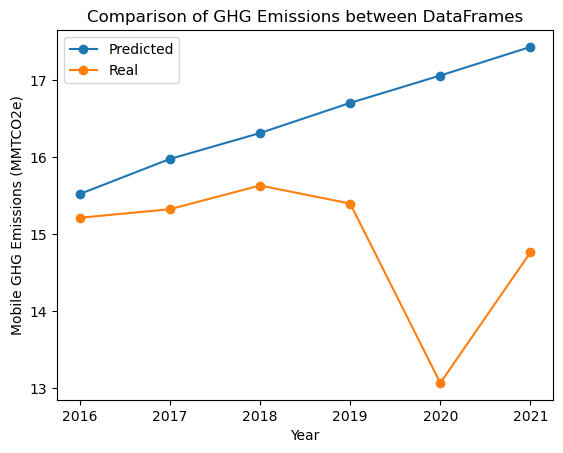

In [29]:
#making predictions on test set and compare
pred=res.predict(start=len(df_train),end=len(new_df)-1,dynamic=False)

# Define a new index
new_index = [2016, 2017, 2018,2019, 2020, 2021]

# Change the index of the Series
#pred = pd.Series(pred.values, index=new_index)

# Convert Series to DataFrame with the first column as the index
predf = pd.DataFrame(list(pred.items()), columns=['Year', 'Mobile GHG Emissions (MMTCO2e)'])
predf['Year']=new_index
#predf['Year'] = pd.to_datetime(predf['Year'], format='%Y')  # Convert the 'Year' column to datetime

# Set the 'Year' column as the index
predf.set_index('Year', inplace=True)

# Plot DataFrame 1
plt.plot(predf.index, predf['Mobile GHG Emissions (MMTCO2e)'], label='Predicted', marker='o')

# Plot DataFrame 2
plt.plot(df_test.index, df_test['Mobile GHG Emissions (MMTCO2e)'], label='Real', marker='o')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Mobile GHG Emissions (MMTCO2e)')
plt.title('Comparison of GHG Emissions between DataFrames')
plt.legend()

# Show the plot
plt.show()

In [30]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(df_test,predf))
rmse
#confidence interval
#without external factor, it will not do well
#plot fitted and predicted
#plot the training model and predicted value and confidence interval, try arima 
#vector autoregression and arima autoregression: need coefficient for : looking at the metric of coefficient
#showing the mean absolute percentage error


2.0697857566724553

In [31]:
#making a future prediction
pred_future=res.predict(start=len(new_df)+1,end=len(new_df)+7,dynamic=False)
print("the future prediction for the next year")
print(pred_future)
print('Number of predictions Made:\t',len(pred_future))

the future prediction for the next year
33    17.853201
34    17.856924
35    17.665308
36    17.413804
37    17.129459
38    16.774912
39    16.432237
dtype: float64
Number of predictions Made:	 7


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


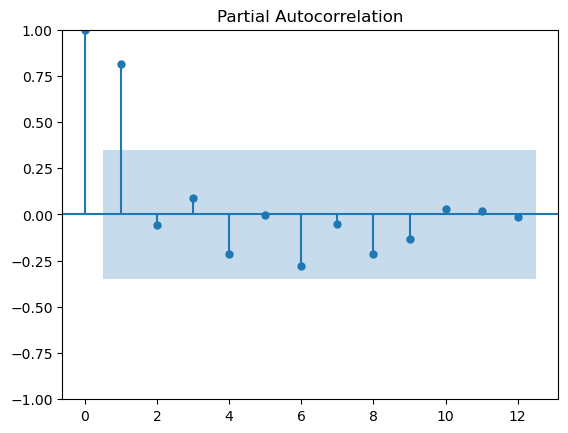

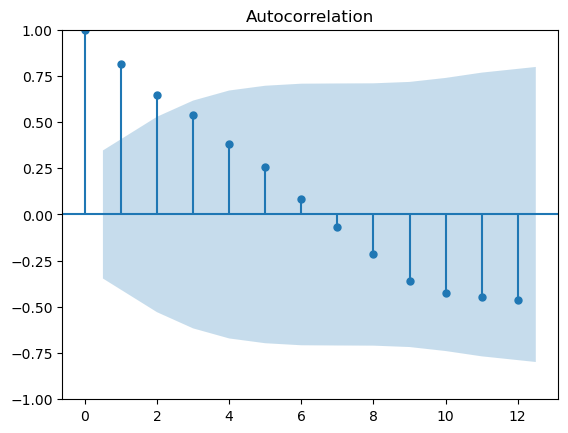

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(new_df['Mobile GHG Emissions (MMTCO2e)'],lags=12)
acf=plot_acf(new_df['Mobile GHG Emissions (MMTCO2e)'],lags=12)

### Create diagnostic figures based on standardized residuals:
- time series graph
- histogram
- Q-Q plot
- correlogram

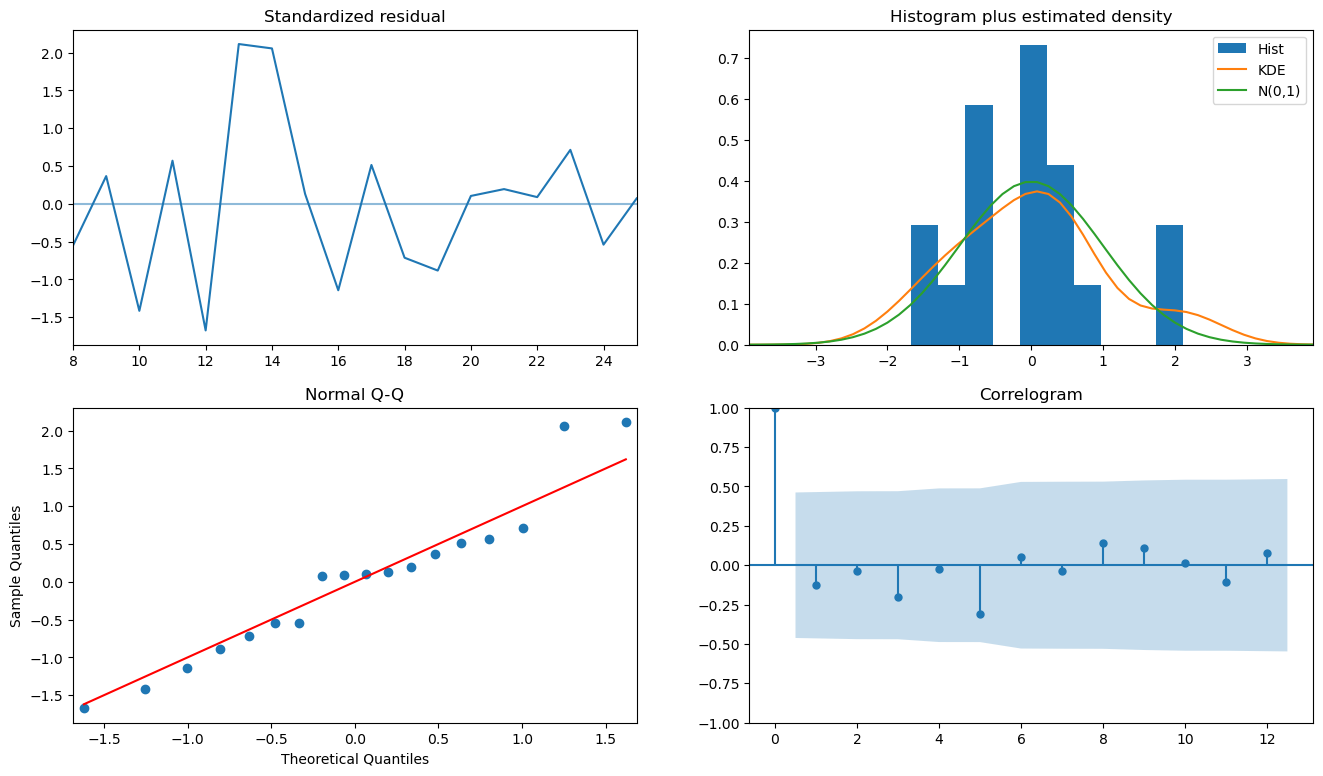

In [33]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=12)

## ARIMA example

In [35]:
data = new_df

,Mobile GHG Emissions (MMTCO2e)
Year,
1990,15.120625
1991,15.005884
1992,15.086747
1993,15.146864
1994,15.066461
1995,14.815692
1996,15.623592
1997,15.679850
1998,15.917011


In [36]:
# Fit the model
mod = sm.tsa.arima.ARIMA(data['Mobile GHG Emissions (MMTCO2e)'], order=(1,1,1))
res = mod.fit()
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:     Mobile GHG Emissions (MMTCO2e)   No. Observations:                   32
Model:                             ARIMA(1, 1, 1)   Log Likelihood                 -34.805
Date:                            Tue, 16 Jan 2024   AIC                             75.610
Time:                                    07:33:15   BIC                             79.912
Sample:                                         0   HQIC                            77.012
                                             - 32                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1491      1.318     -0.113      0.910      -2.733       2.435
ma.L1         -0.0457      1.310   

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [4]:
# Dataset
data['ln_wpi'] = np.log(data['wpi'])
data['D.ln_wpi'] = data['ln_wpi'].diff()

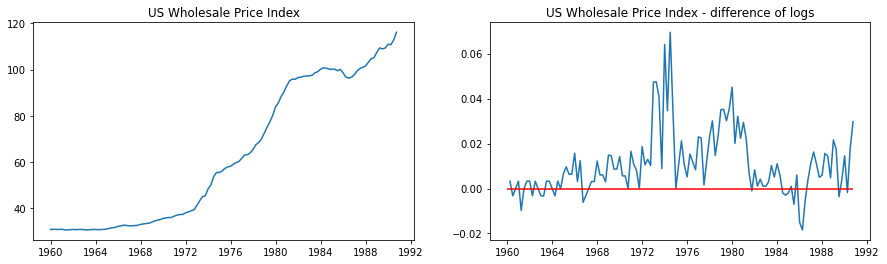

In [5]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

# Levels
axes[0].plot(data.index._mpl_repr(), data['wpi'], '-')
axes[0].set(title='US Wholesale Price Index')

# Log difference
axes[1].plot(data.index._mpl_repr(), data['D.ln_wpi'], '-')
axes[1].hlines(0, data.index[0], data.index[-1], 'r')
axes[1].set(title='US Wholesale Price Index - difference of logs');
fig.savefig('images/diff-ex-wpi.png')

/usr/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


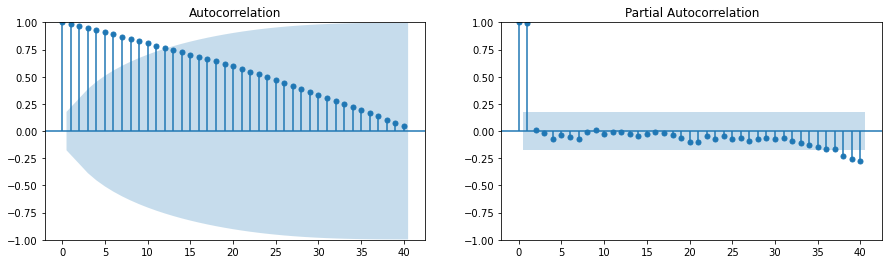

In [6]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(data.iloc[1:]['wpi'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data.iloc[1:]['wpi'], lags=40, ax=axes[1])


/usr/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


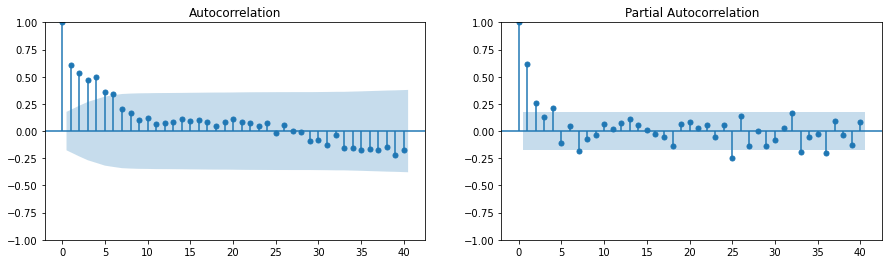

In [7]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(data.iloc[1:]['D.ln_wpi'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data.iloc[1:]['D.ln_wpi'], lags=40, ax=axes[1])



In [8]:
mod2 = sm.tsa.arima.ARIMA(data['D.ln_wpi'], order=(1,1,1))
res = mod2.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:               D.ln_wpi   No. Observations:                  124
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 368.282
Date:                Sat, 16 Apr 2022   AIC                           -730.564
Time:                        13:36:31   BIC                           -722.127
Sample:                    01-01-1960   HQIC                          -727.137
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1593      0.078      2.047      0.041       0.007       0.312
ma.L1         -0.6997      0.062    -11.285      0.000      -0.821      -0.578
sigma2         0.0001   1.01e-05     12.128      0.0